In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(5)
c = ClassicalRegister(4)

In [9]:
circuit = QuantumCircuit(q,c)

# initialte Deutsch
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])
circuit.x(q[4])
circuit.h(q[4])

# oracle 1 (constant)
# circuit.i(q[0])
# circuit.i(q[1])
# circuit.i(q[2])
# circuit.i(q[3])

# oracle 2 (constant)
# circuit.i(q[0])
# circuit.i(q[1])
# circuit.i(q[2])
# circuit.i(q[3])
# circuit.x(q[4])

# oracle 3 (balanced)
circuit.cx(q[0], q[4])
circuit.cx(q[1], q[4])
circuit.cx(q[2], q[4])
circuit.cx(q[3], q[4])

# end Deutsch
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])
circuit.h(q[3])

circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])
circuit.measure(q[3], c[3])
circuit.draw()

┌───┐          ┌───┐     ┌─┐                   
q0_0: ┤ H ├───────■──┤ H ├─────┤M├───────────────────
      ├───┤       │  └───┘┌───┐└╥┘     ┌─┐           
q0_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───────────
      ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐   
q0_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├───
      ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘┌─┐
q0_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫─┤M├
      ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q0_4: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫───────╫──╫─
      └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║       ║  ║ 
c0: 4/══════════════════════════╩═══════╩═══════╩══╩═
                                0       1       2  3

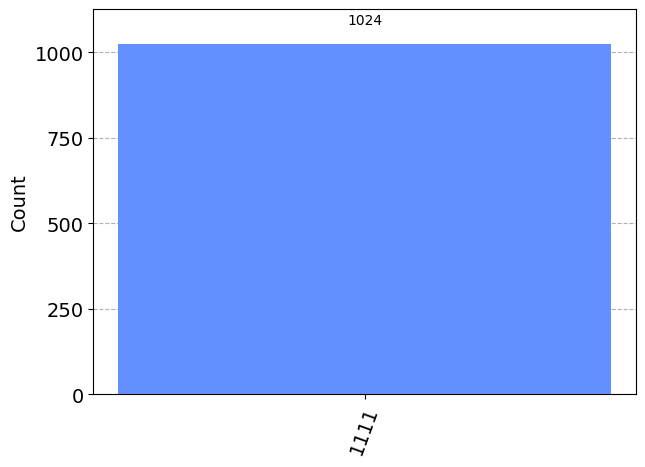

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)